In [9]:
#读取数据
# database_name="all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"]="Times New Roman"
sns.set_theme(style="darkgrid")
data_name="data2"
ratio="0.35"
def load_data(name):
    location="./result/test/performance/"+name+"_"+data_name+"_"+ratio+"_train_performance"+".csv"
    data=pd.read_csv(location,sep=",").iloc[:,1:]
    return data

In [10]:
BP_data_org=load_data("BPNN")
ET_data_org=load_data("ET")
RF_data_org=load_data("RF")
# GR_data_org=load_data("GRNN")

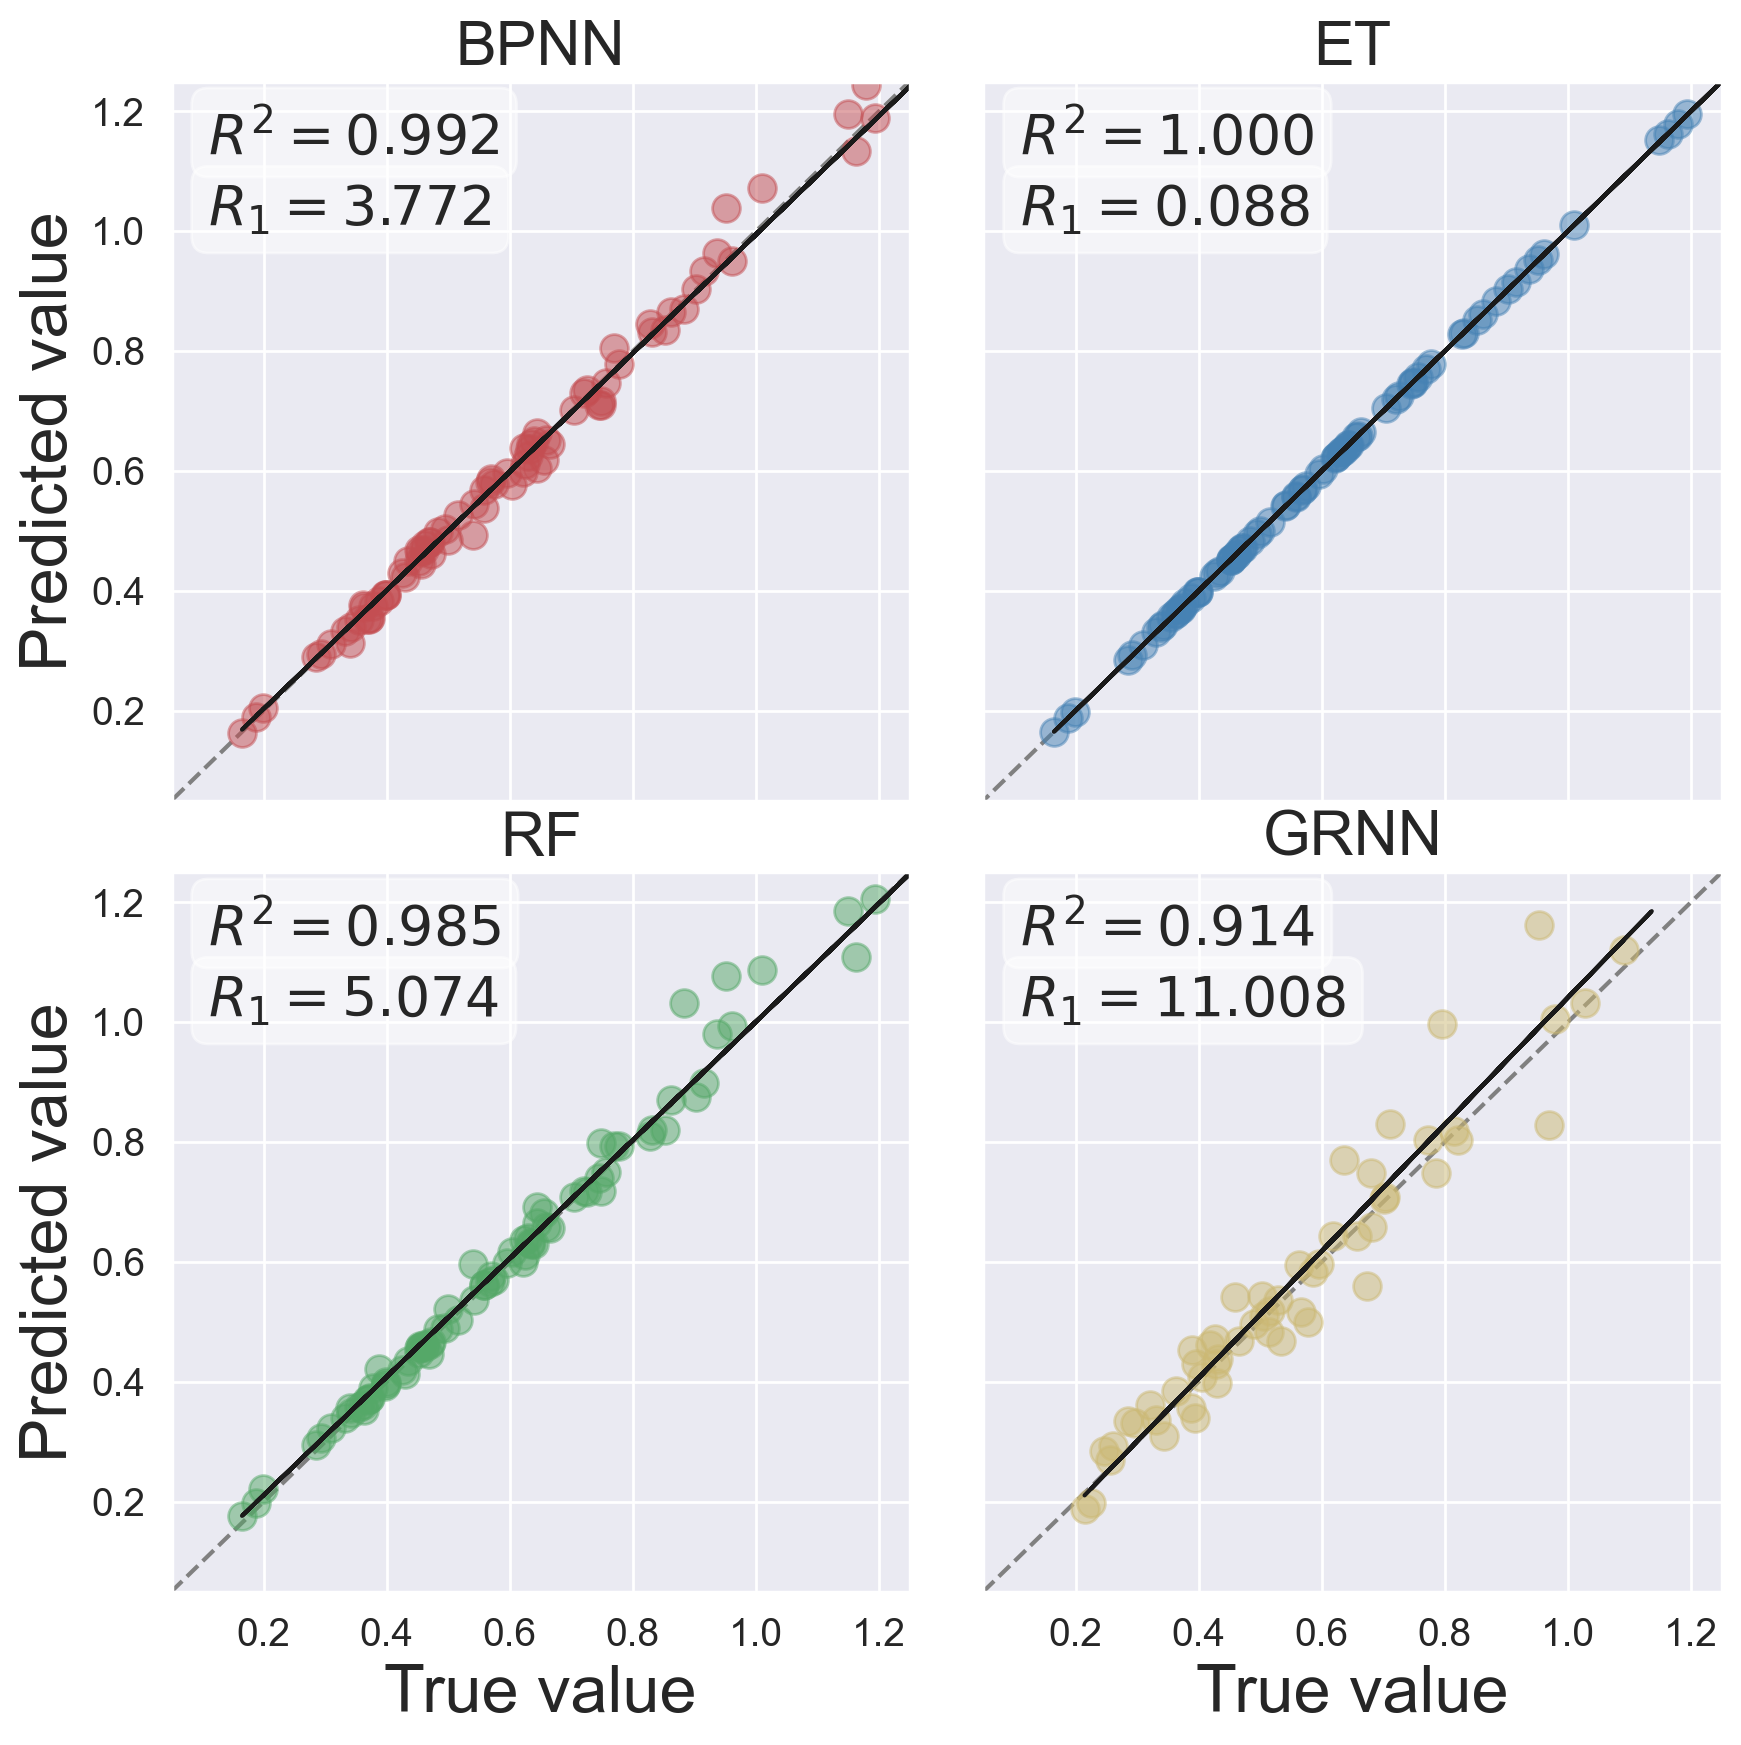

In [12]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(10,10),dpi=200)
plt.subplots_adjust(wspace = 0.1,hspace=0.1)
sns.set_style("darkgrid")
sns.set_palette("Paired",8)
#设置坐标轴
ax1.set_xlim(0.05,1.25)
ax1.set_ylim(0.05,1.25)

ax3.set_xlabel("True value",fontsize=24)
ax3.set_ylabel("Predicted value",fontsize=24)

ax4.set_xlabel("True value",fontsize=24)
ax1.set_ylabel("Predicted value",fontsize=24)

#设置对角线
for ax in [ax1,ax2,ax3,ax4]:
    ax.plot((-10,1000),(-10,1000),ls='--',c='grey', label="1:1 line")
    ax.tick_params(labelsize=14)
ax1.plot(BP_data_org["y"],BP_data_org["pred"],'o',c="r",ms=10,alpha=0.5)
ax2.plot(ET_data_org["y"],ET_data_org["pred"],'o',c="steelblue",ms=10,alpha=0.5)
ax3.plot(RF_data_org["y"],RF_data_org["pred"],'o',c="g",ms=10,alpha=0.5)
ax4.plot(GR_data_org["y"],GR_data_org["pred"],'o',c="y",ms=10,alpha=0.5)
#绘制回归曲线
parameter_A = np.polyfit(BP_data_org["y"],BP_data_org["pred"],1)
f_A = np.poly1d(parameter_A)
ax1.plot(BP_data_org["y"],f_A(BP_data_org["y"]),'k-',lw=1.5,label="")

parameter_B = np.polyfit(ET_data_org["y"],ET_data_org["pred"],1)
f_B = np.poly1d(parameter_B)
ax2.plot(ET_data_org["y"],f_B(ET_data_org["y"]),'k-',lw=1.5,label="")

parameter_C = np.polyfit(RF_data_org["y"],RF_data_org["pred"],1)
f_C = np.poly1d(parameter_C)
ax3.plot(RF_data_org["y"],f_C(RF_data_org["y"]),'k-',lw=1.5,label="")

parameter_D = np.polyfit(GR_data_org["y"],GR_data_org["pred"],1)
f_D = np.poly1d(parameter_D)
ax4.plot(GR_data_org["y"],f_D(GR_data_org["y"]),'k-',lw=1.5,label="")
#文本框
bbox = dict(boxstyle="round", fc='1',alpha=0.5)
ax1.text(0.05, 0.9, '$R^2=%.3f$' % (BP_data_org.loc[0]["R2"]), 
         transform=ax1.transAxes,bbox=bbox,fontfamily='SimHei',fontsize=20)
ax1.text(0.05, 0.8, '$R_1=%.3f$' % (100*BP_data_org.loc[0]["r1"]), 
         transform=ax1.transAxes,bbox=bbox,fontfamily='SimHei',fontsize=20)

ax2.text(0.05, 0.9, '$R^2=%.3f$' % (ET_data_org.loc[0]["R2"]), 
         transform=ax2.transAxes,bbox=bbox,fontfamily='SimHei',fontsize=20)
ax2.text(0.05, 0.8, '$R_1=%.3f$' % (100*ET_data_org.loc[0]["r1"]), 
         transform=ax2.transAxes,bbox=bbox,fontfamily='SimHei',fontsize=20)

ax3.text(0.05, 0.9, '$R^2=%.3f$' % (RF_data_org.loc[0]["R2"]), 
         transform=ax3.transAxes,bbox=bbox,fontfamily='SimHei',fontsize=20)
ax3.text(0.05, 0.8, '$R_1=%.3f$' % (100*RF_data_org.loc[0]["r1"]), 
         transform=ax3.transAxes,bbox=bbox,fontfamily='SimHei',fontsize=20)

ax4.text(0.05, 0.9, '$R^2=%.3f$' % (GR_data_org.loc[0]["R2"]), 
         transform=ax4.transAxes,bbox=bbox,fontfamily='SimHei',fontsize=20)
ax4.text(0.05, 0.8, '$R_1=%.3f$' % (100*GR_data_org.loc[0]["r1"]), 
         transform=ax4.transAxes,bbox=bbox,fontfamily='SimHei',fontsize=20)
#标题
ax1.set_title("BPNN",fontsize=22)
ax2.set_title("ET",fontsize=22)
ax3.set_title("RF",fontsize=22)
ax4.set_title("GRNN",fontsize=22)
savefig_location="./figure/result/"
plt.savefig(savefig_location+"train_"+data_name+"_"+ratio+".tif",bbox_inches="tight")
# print(savefig_location+"RF_"+train_data+".tif")